In [1]:
API_Key = "Emcgt3sWQWlfjXJKcBPDqZQjC"
API_Key_Secret = "AepWh4kUT8qBcYOqPvzwcc6HaNoolqaujKQLfal0x5EWTEgTx7"
Bearer_Token = "AAAAAAAAAAAAAAAAAAAAAHE%2FXgEAAAAA2ZeDDn4f3LpmKrvbvRDw%2BBFaCos%3DMKXjm4jtYZLXk7Jko2G3j84WM2zizwY5mAvijyShiwhioeans9"
Access_Token = "1476338644621398024-ZhIb9ExF7ibgh5L0NJweopWOrKBCkE"
Access_Token_secret = "6xWYf3qCyCZSTvZ8GOTC74FrbbhAAFxeYOXq6yQe2iKE9"

In [2]:
!pip install tweepy
!pip install numpy
!pip install pandas
!pip install matplotlib==2.2.3
!pip install networkx
!pip install wordcloud
!pip install nltk
!pip install textblob
!pip install scipy

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from wordcloud import WordCloud,ImageColorGenerator
from collections import Counter
import numpy as np
import pandas as pd
import tweepy
import re
from time import sleep

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [40]:
auth = tweepy.OAuthHandler(API_Key,API_Key_Secret)
auth.set_access_token(Access_Token,Access_Token_secret)
API = tweepy.API(auth)
results_V2 = []
cursor = tweepy.Cursor(API.search_30_day,"development",query = '(Verstappen OR Lewis Hamilton OR Formula One OR F1 OR Michael Masi -"RT @") lang:en -has:media -has:links',fromDate = '202112120800', toDate = '202112160800', maxResults = 100).pages()

In [43]:
counter = 0
while counter<100:
    delay = 5
    sleep(delay)
    for tweets in cursor.next():
        results_V2.append(tweets)
    counter+=1

In [45]:
results_V2_text = []

for i in range(len(results_V2)):
    container_1 = []
    try:
        container_1 = results_V2[i].extended_tweet['full_text']
        results_V2_text.append(container_1)
    except AttributeError:
        results_V2_text.append(results_V2[i].text)

In [46]:
#Lets first analyze these 100 text
# first let's remove these retweets
results_V2_text_rrt = []
for i in results_V2_text:
    if "RT" not in i:
        results_V2_text_rrt.append(i)
len(results_V2_text_rrt)

4695

In [125]:
stop_words_2 = set(stopwords.words("english"))
additional_stop_words = (".","?",",","'","/","-","“","’","”","#","'s","!",")","(","''","&","amp","``",'ðŸ¤¢ðŸ¤®','would',';','...',':','..','``','1','2','TRUE','*','5',"'re","'m","'ve",'u','....','4','3','8','na','7',"'d",'ðŸ˜‚','â€˜','%',"'ll",'10','100','n','ðŸ¤£','.....','6','f','mv','â€¦','57','ðŸ˜…','ðŸ¤”','12','ðŸ˜‚ðŸ˜‚','=','r','ðŸ¤¡','20','22','ðŸ˜‚ðŸ˜‚ðŸ˜‚','30','ðŸ‘','dr','dt','0','fe','ðŸ¤£ðŸ¤£ðŸ¤£','ðŸ˜‰','ðŸ†','ðŸ¤£ðŸ¤£','40','15','[')
final_stop_words = stop_words_2.union(additional_stop_words)
formula_one = ['f1','one','formula','formula1','formulaon']
lewis = ['lewi','lewis','hamilton','sir','merc','lewishamilton','lh','sirlewishamilton','teamlh','ðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ˜‚lewi','lewisðŸ˜°','lewisâ€¦','lewis.','sirlewi','lewishamilton44','pro-lewi','lewisðŸ¤£your','ðŸ˜ƒlewi','lewisðŸ’œth']
max_1 = ['max','verstappen','maxverstappen','verstapoen','verstapen','verstap','maxverstappen33','/verstappen','max1verstappen','verstaapan','max33verstappen','verstanpen']
masi = ['masi','michael','massi']
robbed = ['rob','lewishamiltonwasrob','champwasrob','robbedï¼',"robbed",'lewiswasrob','lewisrob','robbedðŸ¤·ðŸ¾â€â™‚ï¸ðŸ’']
stand = ['istandwithlewishamilton','istandwithlewi','istandwithsirlewishamilton','standwithlewi','standwithlewishamilton','istandwithlewishamilt','westandwithlewi','istandwithmercedesamgf1']
corruption = ['corrupt','corruptfia','fiacorrupt','corruptlyâ€¦','f1corrupt','corr-ption'] 
fixed = ['f1xed','fix','fiaprizefixing2021','fixat','f1xedpriz','fixed1','race-fix']
injustice = ['injustic','unfair','unfairli','.unfair.unccept']
justiceforlewis = ['justiceforlewi','justic','justiceforlewishamilton','justiceâ€¦','socialjustic',"'justic"]
replacement_dict = {"justiceforlewis":justiceforlewis,"injustice":injustice,"rigged":fixed, "corruption":corruption,'maxverstappen':max_1,"lewishamilton":lewis,"MichaelMasi":masi,"Hamiltonwasrobbed":robbed,"istandwithlewis":stand,"not":"n't",'barf_meme':'🤢'}

def replace_words(text):
    for k in text:
        for j in replacement_dict:
            if k in replacement_dict[j]:
                text[text.index(k)]= j
    return text


In [111]:
#Creating a dataframe first with the tweets gathered

tweets_V1 = pd.DataFrame({'Raw_tweets':results_V2_text_rrt})
tweets_V1


#Clean the Raw tweets

def Clean_tokenize_stop_words_tweets(text_1):
    corpus_2 = re.sub("@[A-Za-z0-9_]+","",string = text_1)
    corpus_3 = word_tokenize(corpus_2)
    corpus_4 = []
    for i in corpus_3:
        if i.casefold() not in final_stop_words:
            corpus_4.append(i.casefold())
    return corpus_4

def sentence_tokenize(text_2):
    corpus_6 = re.sub("@[A-Za-z0-9_]+","",string = text_2)
    corpus_5 = sent_tokenize(corpus_6,language="english")
    return corpus_5

def getPolarity(text_3):
    score = TextBlob(text_3).polarity
    return score
def getSubjectivity(text_3):
    score = TextBlob(text_3).subjectivity
    return score

def stemming(text_4):
    corpus_5 = []
    for i in text_4:
        corpus_5.append(stemmer.lemmatize(i))
    return corpus_5

def make_ngrams(n,text_8):
    ngram_list = []
    ngram = ngrams(text_8,n)
    for i in ngram:
        ngram_list.append("_".join(i))
    return ngram_list

    
tweets_V1['tokenized_sentence_tweets'] = tweets_V1['Raw_tweets'].apply(sentence_tokenize)
tweets_V1['Polarity'] = tweets_V1['Raw_tweets'].apply(getPolarity)
tweets_V1['Subjectivity'] = tweets_V1['Raw_tweets'].apply(getSubjectivity)
tweets_V1['tokenized_cleaned_tweets'] = tweets_V1['Raw_tweets'].apply(Clean_tokenize_stop_words_tweets)
tweets_V1['tokenized_cleaned_tweets_stemmed'] = tweets_V1['tokenized_cleaned_tweets'].apply(stemming)
tweets_V1['tokenized_cleaned_tweets_stemmed_grouped'] = tweets_V1['tokenized_cleaned_tweets_stemmed'].apply(replace_words)
tweets_V1['bigrams'] = tweets_V1['tokenized_cleaned_tweets_stemmed_grouped'].apply(lambda x: make_ngrams(2,x))
tweets_V1['trigrams'] = tweets_V1['tokenized_cleaned_tweets_stemmed_grouped'].apply(lambda x: make_ngrams(3,x))

NameError: name 'results_V2_text_rrt' is not defined

In [122]:
tweets_V1_1 = pd.read_pickle("C:\\Users\\harsh\\OneDrive\\Documents\\Kaggle\\Twitter API Formula One study\\tweets_V1.pkl")
tweets_V1_1

,Raw_tweets,tokenized_sentence_tweets,Polarity,Subjectivity,tokenized_cleaned_tweets,tokenized_cleaned_tweets_stemmed,tokenized_cleaned_tweets_stemmed_grouped,bigrams,trigrams
0,@F1 @LewisHamilton He’s Lucky the queen didn’t...,[ He’s Lucky the queen didn’t change the rule...,0.266667,0.566667,"[lucky, queen, change, rules, end, knight, max...","[lucky, queen, change, rule, end, knight, maxv...","[lucky, queen, change, rule, end, knight, maxv...","[lucky_queen, queen_change, change_rule, rule_...","[lucky_queen_change, queen_change_rule, change..."
1,@F1 @aramco Then you robbed him of the champio...,[ Then you robbed him of the championship.],0.000000,0.000000,"[robbed, championship]","[Hamiltonwasrobbed, championship]","[Hamiltonwasrobbed, championship]",[Hamiltonwasrobbed_championship],[]
2,@azjemenou @firstorlastbaby @Flashakis @F1 @Le...,[ Well they would have then been on the co...,0.059091,0.413636,"[well, correct, tyres, way, max, could, front,...","[well, correct, tyre, way, maxverstappen, coul...","[well, correct, tyre, way, maxverstappen, coul...","[well_correct, correct_tyre, tyre_way, way_max...","[well_correct_tyre, correct_tyre_way, tyre_way..."
3,@RobLMyers @MercedesAMGF1 Now the dust has set...,"[ Now the dust has settled, I’m going to try ...",-0.083333,0.327778,"[dust, settled, going, try, give, f1, watch, n...","[dust, settled, going, try, give, f1, watch, n...","[dust, settled, going, try, give, f1, watch, n...","[dust_settled, settled_going, going_try, try_g...","[dust_settled_going, settled_going_try, going_..."
4,@F1 What about ranking your corruption? Who br...,"[ What about ranking your corruption?, Who bri...",0.188095,0.372222,"[ranking, corruption, bribed, blackmailed, mas...","[ranking, corruption, bribed, blackmailed, Mic...","[ranking, corruption, bribed, blackmailed, Mic...","[ranking_corruption, corruption_bribed, bribed...","[ranking_corruption_bribed, corruption_bribed_..."
...,...,...,...,...,...,...,...,...,...
4690,"@F1 @Max33Verstappen Max Crash-Happen, couldn'...","[ Max Crash-Happen, couldn't win the title fa...",0.525000,0.625000,"[max, crash-happen, could, n't, win, title, fa...","[maxverstappen, crash-happen, could, not, win,...","[maxverstappen, crash-happen, could, not, win,...","[maxverstappen_crash-happen, crash-happen_coul...","[maxverstappen_crash-happen_could, crash-happe..."
4691,#f1xed #f1 couldn’t there be a mass lawsuit ag...,[#f1xed #f1 couldn’t there be a mass lawsuit a...,0.000000,0.000000,"[f1xed, f1, mass, lawsuit, fia, everyone, lost...","[rigged, f1, mass, lawsuit, fia, everyone, los...","[rigged, f1, mass, lawsuit, fia, everyone, los...","[rigged_f1, f1_mass, mass_lawsuit, lawsuit_fia...","[rigged_f1_mass, f1_mass_lawsuit, mass_lawsuit..."
4692,The parallels are actually pretty hilarious. P...,"[The parallels are actually pretty hilarious.,...",0.375000,1.000000,"[parallels, actually, pretty, hilarious, perha...","[parallel, actually, pretty, hilarious, perhap...","[parallel, actually, pretty, hilarious, perhap...","[parallel_actually, actually_pretty, pretty_hi...","[parallel_actually_pretty, actually_pretty_hil..."
4693,@F1 @aramco No amount of Lewis content will ma...,[ No amount of Lewis content will make us for...,0.000000,0.000000,"[amount, lewis, content, make, us, forget, rob...","[amount, lewishamilton, content, make, u, forg...","[amount, lewishamilton, content, make, u, forg...","[amount_lewishamilton, lewishamilton_content, ...","[amount_lewishamilton_content, lewishamilton_c..."


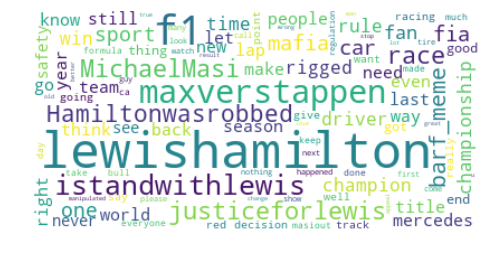

In [460]:
#Word cloud making of only words
def join_tweets(text_5):
    return " ".join([words for words in text_5])
corpus_V2 = " ".join(tweets_V1_1['tokenized_cleaned_tweets_stemmed_grouped'].apply(join_tweets))
fig,ax = plt.subplots(figsize = (8,8))
wordcloud = WordCloud(background_color="white",collocations=False,max_words=100).generate(corpus_V2)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.png")
plt.show()

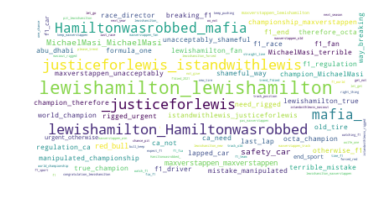

In [148]:
#Word cloud making of bigrams
def join_tweets(text_5):
    return " ".join([words for words in text_5])
corpus_V2 = " ".join(tweets_V1_1['bigrams'].apply(join_tweets))
wordcloud = WordCloud(background_color="white",collocations=False,max_words=100).generate(corpus_V2)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [444]:
#put the position of each word from the target word
tweets_V3 = pd.DataFrame({'rawtext':tweets_V1_1['bigrams'], 'position':None})
for i in range(len(tweets_V3['rawtext'])):
    tweets_V3['position'][i] = [j+1 for j in range(len(tweets_V3['rawtext'][i]))]

#Get the words to a matrix form
#Making a huge array of all the words
tweets_V3_array = []
for i in range(len(tweets_V3)):
    for j in range(len(tweets_V3['rawtext'][i])):
        tweets_V3_array.append(tweets_V3['rawtext'][i][j])

count = dict(Counter(tweets_V3_array))
columns = list(count.keys())
occurences = list(count.values())
occurences_df = pd.DataFrame({'names':columns,'occurences':occurences})

variable_2 = list(occurences_df.loc[occurences_df['occurences']>5,'names'])[:-1]
bigram_drop = [ 'istandwithlewis_istandwithlewis', 'lewishamilton_lewishamilton', 'maxverstappen_maxverstappen', 'MichaelMasi_MichaelMasi', 'wo_not', 'not_want', '2021_let', 'let_get', 'get_not', 'not_give', 'give_let', 'go_keep', 'keep_pushing', 'pushing_everyone', 'justiceforlewis_istandwithlewis', 'lewishamilton_maxverstappen', 'istandwithlewis_rigged', 'watching_f1', 'lewishamilton_justiceforlewis', 'lewishamilton_f1', 'f1_lewishamilton', 'rigged_masiout', 'lewishamilton_istandwithlewis', 'masiout_istandwithlewis', 'champion_MichaelMasi', 'mafia_🤢\U0001f92e', '🤢\U0001f92e_justiceforlewis', 'Hamiltonwasrobbed_🤢\U0001f92e',"ca_not","f1_fan"]
for i in variable_2:
    if i in bigram_drop:
        variable_2.remove(i)
        
#the position of each word in the tweets
position_corpus = list()
counter = 0

for i in variable_2:
    position_word = []
    for j in tweets_V3['rawtext']:
        try:
            position_2 = j.index(i)
            position_word.append(position_2)
        except:
            position_word.append(np.NaN)
    position_corpus.append(position_word)

position_Df = pd.DataFrame(position_corpus)
position_Df_2 = position_Df.transpose()
position_Df_2.columns = variable_2
position_Df_2_corr = abs(position_Df_2.corr())
position_Df_2_corr_2 = pd.melt(position_Df_2_corr,ignore_index=False)
position_Df_2_corr_5 = position_Df_2_corr_2.reset_index(drop = False)
position_Df_2_corr_4 = pd.read_csv("C:\\Users\\harsh\\OneDrive\\Documents\\Kaggle\\Twitter API Formula One study\\position_Df_2_corr_4.csv") 

#Give only unique rows
variable_1 = list(position_Df_2_corr_4['index'])
for i in range(len(position_Df_2_corr_4)):
    variable_1.append(position_Df_2_corr_4.loc[i,'variable'])
variable_3 = set(variable_1)
print(variable_3)

{'maxverstappen_lewishamilton', 'f1_fia', 'let_car', 'lewishamilton_fan', 'track_position', 'car_finish', 'maxverstappen_old', 'maxverstappen_win', 'car_allowed', 'lewishamilton_pitted', 'next_year', 'pit_lewishamilton', 'f1_not', 'car_maxverstappen', 'one_lap', 'behind_safety', 'red_bull', 'old_tire', 'f1_race', 'give_maxverstappen', 'world_champion', 'lapped_car', 'red_flag', 'maxverstappen_not', 'end_race', 'last_lap', '2021_f1', 'maxverstappen_fan', 'mercedes_fan', 'race_director', 'not_get', 'safety_car', 'new_tire', 'f1_world'}


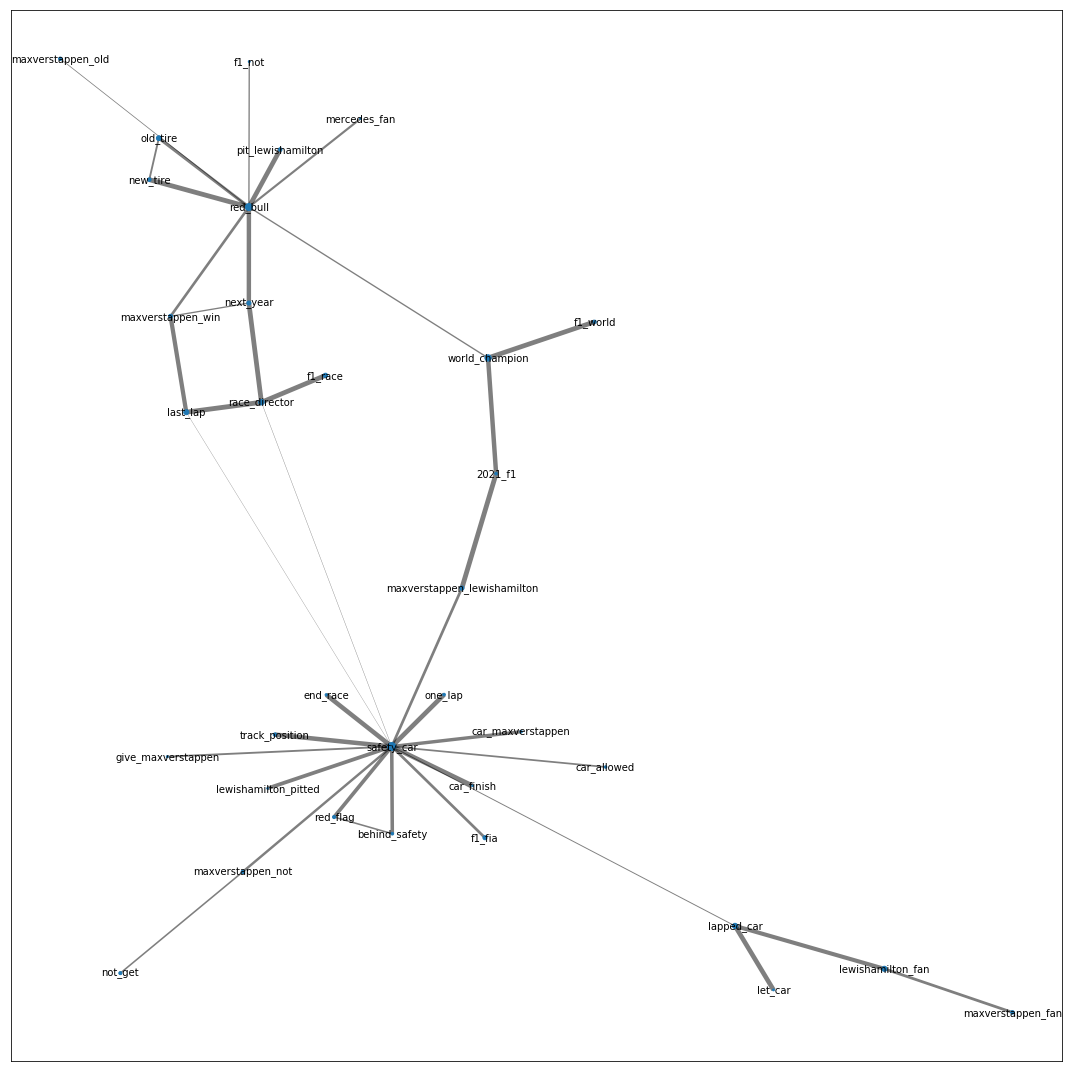

In [456]:
import networkx as nx
import matplotlib.pylab as plt
edges = list()
for i in range(len(position_Df_2_corr_4)): 
    edges.append((position_Df_2_corr_4['index'][i],position_Df_2_corr_4['variable'][i],position_Df_2_corr_4['value'][i]*10))

#Network graph
fig, ax = plt.subplots(figsize=(15, 15))
ad_1 = nx.Graph()
ad_1.add_nodes_from(variable_3)
ad_1.add_weighted_edges_from(edges)
position = nx.spring_layout(ad_1)
node_size = [int(occurences_df.loc[occurences_df['names']==i,'occurences'])/2 for i in variable_3]
nx.draw_networkx_nodes(variable_3,pos=position,node_size = node_size)
nx.draw_networkx_edges(ad_1,edgelist = edges,pos=position,width = position_Df_2_corr_4['value']*5,alpha = 0.5)
nx.draw_networkx_labels(ad_1,pos=position,font_size = 10)
fig.tight_layout()
fig.savefig("network_2.png")
plt.show()

In [127]:
#Analysis and Things that I can do
'''
1. Words surrounding F1
2. Words surrounding Verstappen
3. Words surrounding Lewis Hamilton
4. POS tagging and removing irrelevant words

You know what bigrams do give us useful information, might have to do some manual work but this could work
'''
tweets_V1_1['tokenized_cleaned_tweets_stemmed_grouped'] = tweets_V1_1['tokenized_cleaned_tweets_stemmed_grouped'].apply(replace_words)

#Starting POS tagging
POS_tag = []
for i in tweets_V1_1['tokenized_cleaned_tweets_stemmed_grouped']:
    POS_tag.append(nltk.pos_tag(i))


verb = []
for i in POS_tag:
    for j in i: 
        if "JJ" in j:
            verb.append(j[0])


#Then i want to see the frequency distribution
bigrams = []
for i in tweets_V1_1['bigrams']:
    for j in i:
        bigrams.append(j)

freq_3 = nltk.FreqDist(bigrams)
'''
grammar = "NP: {<JJ><NN>}"
chunk_parser = nltk.RegexpParser(grammar)
test = tweets_V1_1['tokenized_cleaned_tweets_stemmed_grouped'][8]

tree = chunk_parser.parse(nltk.pos_tag(test))
for i in tree.subtrees():
    if i.label() == "NP": print(i)
'''

('justiceforlewis_istandwithlewis', 527)


'\ngrammar = "NP: {<JJ><NN>}"\nchunk_parser = nltk.RegexpParser(grammar)\ntest = tweets_V1_1[\'tokenized_cleaned_tweets_stemmed_grouped\'][8]\n\ntree = chunk_parser.parse(nltk.pos_tag(test))\nfor i in tree.subtrees():\n    if i.label() == "NP": print(i)\n'

In [179]:
#Make a dataframe and then plot the most common occuring bigrams
bigram = []
occurences_2 = []
for i in freq_3.most_common():
    bigram.append(i[0])
    occurences_2.append(i[1])

bigram_df = pd.DataFrame({'bigram':bigram,'occurences':occurences_2})
bigram_df[0:10]
removal = ['lewishamilton_lewishamilton','MichaelMasi_MichaelMasi','maxverstappen_maxverstappen',"ca_not"]

bigram_df_2 = bigram_df[bigram_df['bigram'].str.contains("lewishamilton_lewishamilton|MichaelMasi_MichaelMasi|maxverstappen_maxverstappen|ca_not|istandwithlewis_justiceforlewis|🤢🤮_justiceforlewis|mafia_🤢🤮")==False]
bigram_df_3 = bigram_df_2.loc[0:15,].sort_values(by = 'occurences')

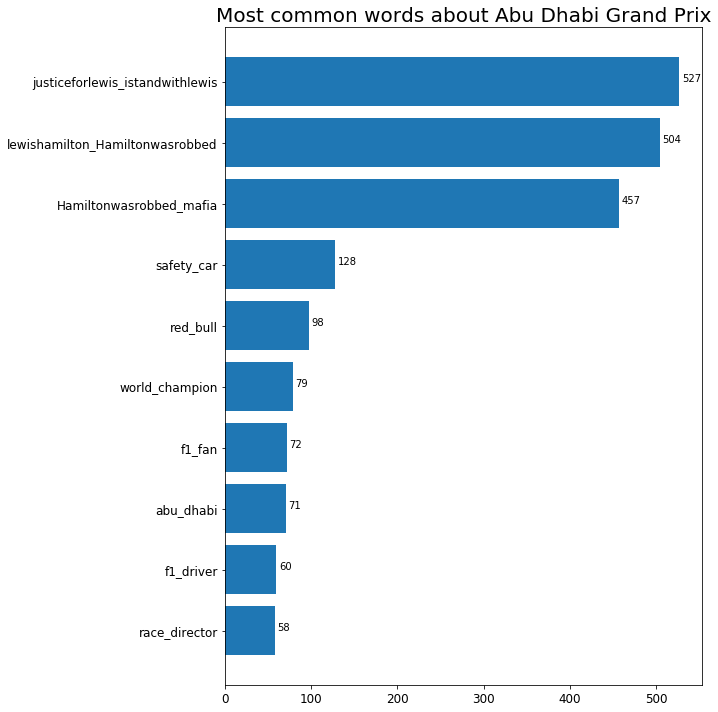

In [464]:
fig,ax = plt.subplots(figsize = (10,10))
plt.barh(bigram_df_3['bigram'],bigram_df_3['occurences'])

y = bigram_df_3['occurences']
xlabels = [100*i for i in range(0,6)]
ax.set_title("Most common words about Abu Dhabi Grand Prix",fontdict = {'fontsize':20})
ax.set_yticklabels(bigram_df_3['bigram'],fontdict = {'fontsize':12}) 
for i, v in enumerate(y):
    ax.text(v + 3, i , str(v))
ax.set_xticklabels(xlabels, fontdict = {'fontsize':12}) 
plt.tight_layout()
plt.savefig("common_words.png")
plt.show()

In [246]:
#So i tried making trigrams and visualizing them to see if there was any useful information however there wasn't
#Now I will attempt to see what people thought about Michael Masi (get around 6 words)

def bigrams_around_a_person(name):
    words = []
    for i in tweets_V1_1['tokenized_cleaned_tweets_stemmed_grouped']:
        if name in i:
            words.append(ngrams(i[i.index(name)-6:i.index(name)+6],2))
    
    words_2 = [i for i in words if i!=[]]
    words_3 = []
    for i in words_2:
        for j in i:
            words_3.append(j)
    return words_3

Masi = bigrams_around_a_person('MichaelMasi')
Freq_Masi = nltk.FreqDist(Masi)
Masi_words = []
Masi_occurences = []
for i in Freq_Masi.most_common():
    Masi_words.append(i[0])
    Masi_occurences.append(i[1]+ np.random.randint(0,high = 50))

Masi_df = pd.DataFrame({'Masi_Words':Masi_words,'Masi_occurences':Masi_occurences})
Masi_df[0:50]
index_removal = [0,4,5,6,7,14,15]
Masi_df_2 = Masi_df.drop(index = index_removal)
Masi_df_2

,Masi_Words,Masi_occurences
1,"(championship, maxverstappen)",64
2,"(lewishamilton, true)",38
3,"(true, champion)",48
8,"(MichaelMasi, terrible)",66
9,"(terrible, mistake)",70
...,...,...
1890,"(plain, sight)",49
1891,"(sight, MichaelMasi)",14
1892,"(MichaelMasi, snd)",48
1893,"(snd, steward)",35


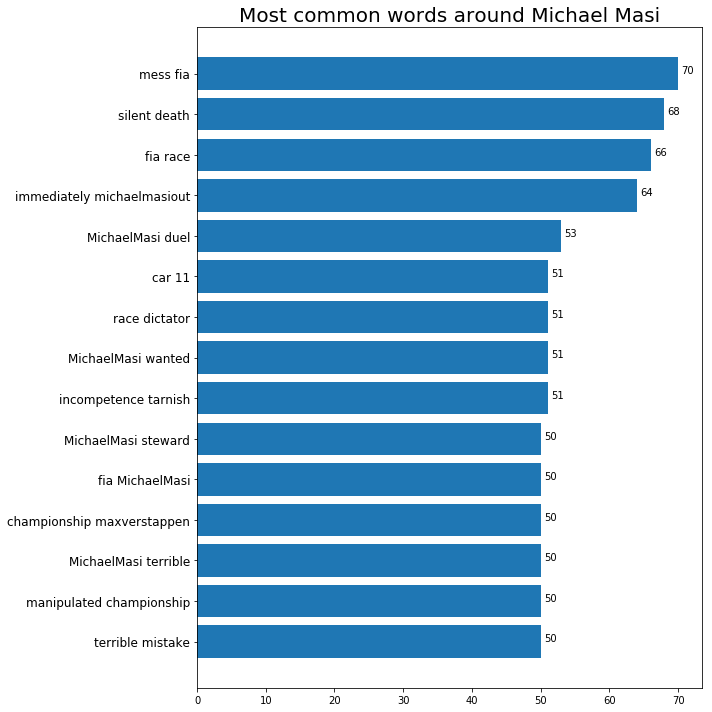

In [466]:
Masi_df_3 = Masi_df_2.sort_values(by = 'Masi_occurences',ascending = False).reset_index(drop = True)
Masi_df_4 = Masi_df_3[0:15]
Masi_Words_2 = Masi_df_4['Masi_Words'].apply(lambda x : " ".join(x))

#Plotting
fig,ax = plt.subplots(figsize = (10,10))
plt.barh(Masi_Words_2[::-1],Masi_df_4['Masi_occurences'][::-1])
xlabels = [10*i for i in range(0,8)]
ax.set_title("Most common words around Michael Masi",fontdict = {'fontsize':20})
ax.set_yticklabels(Masi_df_4['Masi_Words'].apply(lambda x : " ".join(x)),fontdict = {'fontsize':12}) 
for i, v in enumerate(Masi_df_4['Masi_occurences'][::-1]):
    ax.text(v + 0.5, i , str(v),fontdict = {'fontsize':10})
plt.tight_layout()
plt.savefig("masi_words.png") 
plt.show()

In [400]:
position_Df_2_corr_4.to_csv("position_Df_2_corr_4.csv")

In [349]:
len(variable_2)

38611

TypeError: subgraph() missing 1 required positional argument: 'nbunch'